# Assignment 8 (A small project)


Due date: April 29, 2022, 11:59pm

In [17]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import norm

In this question, we will use all we have learned about Python to do a project about big data processing. We observe earthquakes and topography on the Earth’s surface. The goal of this project is to determine the correlation between these two, or to check if large earthquakes preferentially occur in regions with high or low topography.

There are 2 data files in this folder:
“Large-Eq.csv”: an earthquake catalog containing 25,000 events with a magnitude >5.0 since year 2007. The data structure is the same as the other earthquake catalog files we used in this class.
“topo.dat”: topography data. The 3 columns are Longitude, latitude, and elevation, respectively.

1. You will eventually make a plot showing the relationship between the number of earthquakes and the elevation, e.g., a plot in which the horizontal axis is the elevation and the vertical axis is the number of earthquakes. I provide an example figure in the example.pdf file. However, you can make any plot that you want and the details of the figure depend on your choice. The key is that people should easily find under what elevation the earthquakes happen the most by reading your plot. If you want to make histograms, you will need to study by your self through online materials.
2. Your codes should run without problem. 
3. Your codes should be readable to me. Please include as many comments as you think is necessary
4. Group discussion is encouraged. However, do not copy others’ codes. 
5. Make your code run as fast as possible. When you turn in your codes, provide information on how long it takes to run the code on your computer.
6. Grades will be based on both the correctness and the readability of the codes.
7. Please try to make your code run as fast and precise as possible. Ideally, the code takes a few seconds. It should not take more than 10 minutes.


Important hints: 
1. in the earthquake catalog, the longitude ranges from -180o to 180o. The negative values indicate in the west and the positive values indicate in the east. However, in the topography data, the longitude ranges from 0o to 360o, which means 0-180 degree is in the eastern hemisphere and 180-360 degrees is in the western hemisphere. In both cases, the 0o is defined as the Zero degrees longitude which is an imaginary line known as the Prime Meridian, and you are moving eastward as the longitude increases.
2. the grid points of (longitude, latitude) in the earthquake catalog often does not match the grid points in the topography data. Therefore, you need to be creative when finding the elevation for an earthquake from the topography file, e.g., choosing the closest grid points in topo.dat, or do intepolation.

Time for Code Execution: 6.064897060394287s


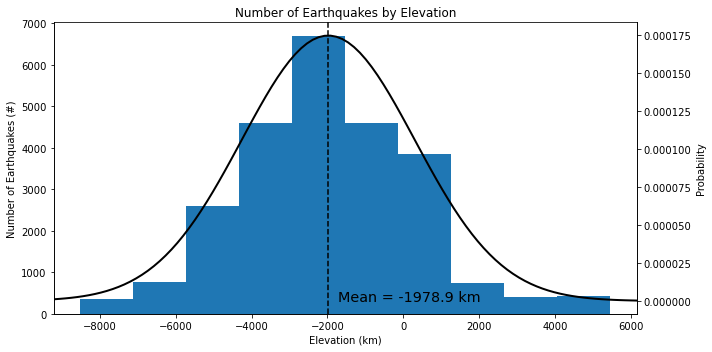

In [18]:
"""
Earthquake class will contain lat, lon, elevation, and topography information. It will use the topography object member
to map lat/lon pairs to elevation. It will then plot a histogram with a PDF as well.
"""
class Earthquakes:
    def __init__(self, eq_csv, topo):
        """
        Initialized with the csv with eq data, and a topography object.
        """
        self.lat, self.lon = np.loadtxt(eq_csv, usecols=(5,6), unpack=True, skiprows=1, delimiter=',')
        self.ele = []
        """
        Need to adjust the lon to match the topography format.
        """
        for i in range(len(self.lon)):
            if self.lon[i] <= 0:
                self.lon[i] = self.lon[i] + 360
            """
            Round the lat/lon pairs to the nearest int to match topography data
            """
            self.lon[i] = round(self.lon[i])
            self.lat[i] = round(self.lat[i])
        self.topo = topo

    def get_elevation(self):
        for i in range(len(self.lon)):
            """
            Use topography to map the lat/lon pairs to elevation, and store them in the elevation array
            """
            self.ele.append(self.topo.map_to_elevation(self.lon[i], self.lat[i]))

    def plot_histogram(self, bins, size):
        if len(self.ele) == 0:
            """
            Get the elevations if you haven't.
            """
            self.get_elevation()
        fig = plt.figure(1, figsize=size)

        """
        Plot the histogram.
        """
        ax1 = fig.add_subplot(1,1,1)
        ax1.hist(self.ele, bins)
        ax1.set_xlabel('Elevation (km)')
        ax1.set_ylabel('Number of Earthquakes (#)')
        ax1.set_title('Number of Earthquakes by Elevation')
        
        """
        Plot the PDF.
        """
        ax2 = ax1.twinx()
        mu, std = norm.fit(self.ele)
        xmin, xmax = ax1.set_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        ax2.plot(x, p, 'k', linewidth=2)
        ax2.axvline(mu, linestyle = '--', color='black')
        ax2.text(mu + 250, 0.0000002, f'Mean = {round(mu, 1)} km', color='black', fontsize='x-large')
        ax2.set_ylabel('Probability')

        fig.tight_layout()

"""
Topography class will contain sets of lat/lon/elevation pairs. Its main purpose is to take a lat/lon pair
and find the corresponding elevation.
"""
class Topography:
    def __init__(self, topo_data):
        """
        Initialized with topography dat file.
        """
        self.lon, self.lat, self.ele = np.loadtxt(topo_data, unpack=True)

    def map_to_elevation(self, lon, lat):
        """
        Find where the input lat/lon are in the dataset.
        """
        lon_match = set(np.where(self.lon == lon)[0])
        lat_match = np.where(self.lat == lat)[0]
        """
        Find the intersection of the two matches.
        """
        match_index = list(lon_match.intersection(lat_match))[0]
        return self.ele[match_index]
     
"""
Start by checking the time before program starts to run.
"""
program_start = time.time()
"""
Initialize objects and plot the histogram.
"""
Earthquakes('Large_Eq.csv', Topography('topo.dat')).plot_histogram(10, [10, 5])
"""
Display the time it took to execute the entire program.
"""
print(f'Time for Code Execution: {time.time() - program_start}s')
